In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('drive/My Drive/covid_mask')

In [3]:
print(len(os.listdir('data/train/with_mask')))

400


In [4]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

traindata = []
i = 0
for img in os.listdir('data/train/with_mask'):
  print(i,end = "")
  i+=1
  image = load_img('data/train/with_mask/'+str(img), target_size=(224, 224))
  image = img_to_array(image)
  image = preprocess_input(image)
  traindata.append([image,0])
 
for img in os.listdir('data/train/without_mask'):
  print(i,end = "")
  i+=1
  image = load_img('data/train/without_mask/'+str(img), target_size=(224, 224))
  image = img_to_array(image)
  image = preprocess_input(image)
  traindata.append([image,1])


0123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899100101102103104105106107108109110111112113114115116117118119120121122123124125126127128129130131132133134135136137138139140141142143144145146147148149150151152153154155156157158159160161162163164165166167168169170171172173174175176177178179180181182183184185186187188189190191192193194195196197198199200201202203204205206207208209210211212213214215216217218219220221222223224225226227228229230231232233234235236237238239240241242243244245246247248249250251252253254255256257258259260261262263264265266267268269270271272273274275276277278279280281282283284285286287288289290291292293294295296297298299300301302303304305306307308309310311312313314315316317318319320321322323324325326327328329330331332333334335336337338339340341342343344345346347348349350351352353354355356357358359360361362363364365366367368369

In [0]:
testdata = []

for img in os.listdir('data/val/with_mask'):
  image = load_img('data/val/with_mask/'+str(img), target_size=(224, 224))
  image = img_to_array(image)
  image = preprocess_input(image)
  testdata.append([image,0])
for img in os.listdir('data/val/without_mask'):
  image = load_img('data/val/without_mask/'+str(img), target_size=(224, 224))
  image = img_to_array(image)
  image = preprocess_input(image)
  testdata.append([image,1])


In [0]:
#shuffle
import random
random.shuffle(traindata)
random.shuffle(testdata)


In [7]:
print(len(traindata),len(testdata))

800 50


In [8]:
trainX = []
testX = []
trainY = []
testY = []

for x in traindata:
  trainX.append(x[0])
  trainY.append(x[1])
for x in testdata:
  testX.append(x[0])
  testY.append(x[1])
print(len(trainX),len(testY))


800 50


In [0]:
import numpy as np
trainX = np.array(trainX, dtype="float32")
trainY = np.array(trainY)
testX = np.array(testX, dtype="float32")
testY = np.array(testY)

In [10]:
from tensorflow.keras.utils import to_categorical

train_y =  to_categorical(trainY)
test_y = to_categorical(testY)

print(train_y[0],test_y[26])

[1. 0.] [0. 1.]


In [0]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [12]:
m1 = MobileNetV2(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))
m2 = m1.output
m2 = AveragePooling2D(pool_size=(7, 7))(m2)
m2 = Flatten(name="flatten")(m2)
m2 = Dense(128, activation="relu")(m2)
m2 = Dropout(0.5)(m2)
m2 = Dense(2, activation="softmax")(m2)
model = Model(inputs=m1.input, outputs=m2)
for layer in m1.layers:
	layer.trainable = False

9412608/9406464 [==============================] - 0s 0us/step


In [13]:

opt = Adam(lr=1e-4, decay=1e-4 / 20)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

model.fit(trainX,train_y,batch_size = 32,epochs=20,validation_data=(testX,test_y))

Epoch 1/20
25/25 [==============================] - 2s 79ms/step - loss: 0.4893 - accuracy: 0.7713 - val_loss: 0.0678 - val_accuracy: 1.0000
Epoch 2/20
25/25 [==============================] - 1s 34ms/step - loss: 0.1624 - accuracy: 0.9450 - val_loss: 0.0195 - val_accuracy: 1.0000
Epoch 3/20
25/25 [==============================] - 1s 34ms/step - loss: 0.0994 - accuracy: 0.9563 - val_loss: 0.0176 - val_accuracy: 1.0000
Epoch 4/20
25/25 [==============================] - 1s 33ms/step - loss: 0.0860 - accuracy: 0.9700 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 5/20
25/25 [==============================] - 1s 34ms/step - loss: 0.0779 - accuracy: 0.9737 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 6/20
25/25 [==============================] - 1s 34ms/step - loss: 0.0548 - accuracy: 0.9762 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 7/20
25/25 [==============================] - 1s 34ms/step - loss: 0.0472 - accuracy: 0.9812 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 8/20
25

In [0]:
model.save('masking.h5')

In [0]:
model.save_weights('masking_weights.h5')

mask


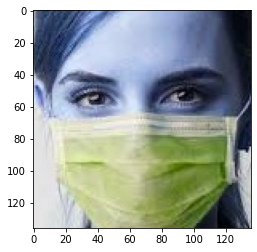

In [0]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('ny.jpg')
plt.imshow(img)
face = cv2.resize(img, (224, 224))

face = img_to_array(face)
face = preprocess_input(face)
face = np.expand_dims(face, axis=0)

#img =  np.array(img, dtype="float32")
x = model.predict(face)
if np.argmax(x) == 0:
  print("mask")
else:
  print("no mask")

In [0]:
model.save('face_covid',save_format = 'h5')